# Алгоритмы

In [1]:
from gmpy2 import powmod
import sys


def algoritm_1(a, q):
    """q = 5 (mod 8)"""
    b = powmod(2 * a, (q - 5) // 8, q)
    i = (2 * a * (b ** 2)) % q
    x = (a * b * (i - 1)) % q
    return x


def algoritm_2(a, q):
    """q = 9 (mod 16)"""
    b = powmod(2 * a, (q - 1) // 4, q)
    if b == q - 1:
        b = -1

    d = 0
    for j_d in range(2, q):
        if -b == kronecker(j_d, q):
            d = j_d
            break
    if d == 0:
        sys.exit("Can not find d")

    u = powmod(2 * a * (d ** 2), (q - 9) // 16, q)
    i = (2 * (u ** 2) * (d ** 2) * a) % q
    x = (u * d * a * (i - 1)) % q
    return x


def algoritm_3(a, q):
    """q = 9 (mod 16)"""
    b = powmod(2 * a, (q - 9) // 16, q)
    i = (2 * a * (b ** 2)) % q
    r = (i ** 2) % q
    if r == q - 1:
        x = (a * b * (i - 1)) % q
    else:
        d = 0
        for j_d in range(2, q):
            if kronecker(j_d, q) == -1:
                d = j_d
                break
        if d == 0:
            sys.exit("Can not find d")

        u = b * powmod(d, (q - 9) // 8, q) % q
        i = (2 * (u ** 2) * (d ** 2) * a) % q
        x = (u * d * a * (i - 1)) % q
    return x


def algoritm_4(c, q, xi):
    """q = 5 (mod 8); s = 2"""
    b = powmod(c, (q - 5) // 8, q)
    zeta = (c * (b ** 2)) % q
    if zeta == 1:
        x = (c * b) % q
    else:
        x = (c * b * xi) % q
    return x


def algoritm_5(c, q, xi):
    """q = 9 (mod 16); s = 3"""
    b = powmod(c, (q - 9) // 16, q)
    zeta = (c * (b ** 2)) % q
    if zeta == 1:
        x = (c * b) % q
    elif zeta == q - 1:
        x = (c * b * (xi ** 2)) % q
    elif zeta == (xi ** 2) % q:
        x = (c * b * (xi ** 3)) % q
    else:
        x = (c * b * xi) % q
    return x


def algoritm_6(c, q, xi):
    """q = 17 (mod 32); s = 4"""
    b = powmod(c, (q - 17) // 32, q)
    X = (c * b) % q
    zeta = (X * b) % q
    A = xi
    B = (A ** 2) % q
    C = (B ** 2) % q
    D = (B * C) % q

    if zeta == 1:
        x = X
    elif zeta == q - 1:
        x = (X * C) % q
    elif zeta == B:
        x = (X * A * D) % q
    elif zeta == q - B:
        x = (X * A * B) % q
    elif zeta == C:
        x = (X * D) % q
    elif zeta == q - C:
        x = (X * B) % q
    elif zeta == D:
        x = (X * A * C) % q
    elif zeta == q - D:
        x = (X * A) % q
    else:
        x = 0
    return x


def xi_value(q, s):
    d = 0
    for j_d in range(2, q):
        if kronecker(j_d, q) == -1:
            d = j_d
            break
    if d == 0:
        sys.exit("Can not find d")
    xi = powmod(d, (q - 1) // (2 ** s), q)
    return xi

# Тесты

In [2]:
def test_456(s, q, c, alg):
    mod_s = 2 ** (s + 1)
    print(q, '=', q % mod_s, 'mod', mod_s, '; Символ Лежандра (c/q) =', kronecker(c, q))
    xi = xi_value(q, s)
    x = alg(c, q, xi)
    print('x =', x, '; x^2 =', x ** 2 % q, '; c =', c)
    print('Проверка равенства:', x ** 2 % q == c)

In [3]:
test_456(2, 50461, 111, algoritm_4)

50461 = 5 mod 8 ; Символ Лежандра (c/q) = 1
x = 31367 ; x^2 = 111 ; c = 111
Проверка равенства: True


In [4]:
test_456(2, 517613, 500000, algoritm_4)

517613 = 5 mod 8 ; Символ Лежандра (c/q) = -1
x = 385506 ; x^2 = 419541 ; c = 500000
Проверка равенства: False


In [5]:
test_456(3, 544793, 404, algoritm_5)

544793 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 418943 ; x^2 = 404 ; c = 404
Проверка равенства: True


In [6]:
test_456(3, 160025, 17, algoritm_5)

160025 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 8778 ; x^2 = 81259 ; c = 17
Проверка равенства: False


In [7]:
test_456(4, 50126833, 111111, algoritm_6)

50126833 = 17 mod 32 ; Символ Лежандра (c/q) = 1
x = 1978118 ; x^2 = 111111 ; c = 111111
Проверка равенства: True


In [8]:
test_456(4, 700139537, 111111, algoritm_6)

700139537 = 17 mod 32 ; Символ Лежандра (c/q) = -1
x = 0 ; x^2 = 0 ; c = 111111
Проверка равенства: False


In [9]:
def test_123(s, q, c, alg):
    mod_s = 2 ** (s + 1)
    print(q, '=', q % mod_s, 'mod', mod_s, '; Символ Лежандра (c/q) =', kronecker(c, q))
    x = alg(c, q)
    print('x =', x, '; x^2 =', x ** 2 % q, '; c =', c)
    print('Проверка равенства:', x ** 2 % q == c)

In [10]:
test_123(2, 10141, 1111, algoritm_1)

10141 = 5 mod 8 ; Символ Лежандра (c/q) = 1
x = 1895 ; x^2 = 1111 ; c = 1111
Проверка равенства: True


In [11]:
test_123(2, 1001093, 7707, algoritm_1)

1001093 = 5 mod 8 ; Символ Лежандра (c/q) = 1
x = 147179 ; x^2 = 7707 ; c = 7707
Проверка равенства: True


In [12]:
"""Тест с некорректным вводом"""
test_123(2, 305101, 666, algoritm_1)

305101 = 5 mod 8 ; Символ Лежандра (c/q) = -1
x = 0 ; x^2 = 0 ; c = 666
Проверка равенства: False


In [13]:
test_123(3, 11801, 23, algoritm_2)

11801 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 2221 ; x^2 = 23 ; c = 23
Проверка равенства: True


In [14]:
test_123(3, 1009433, 234567, algoritm_2)

1009433 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 747634 ; x^2 = 234567 ; c = 234567
Проверка равенства: True


In [15]:
"""Тест с некорректным вводом"""
"""test_123(3, 300953, 666, algoritm_2)"""

'test_123(3, 300953, 666, algoritm_2)'

In [16]:
test_123(3, 11801, 23, algoritm_3)

11801 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 2221 ; x^2 = 23 ; c = 23
Проверка равенства: True


In [17]:
test_123(3, 1009433, 234567, algoritm_3)

1009433 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 747634 ; x^2 = 234567 ; c = 234567
Проверка равенства: True


In [18]:
"""Тест с некорректным вводом"""
test_123(3, 1625, 98, algoritm_3)

1625 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 438 ; x^2 = 94 ; c = 98
Проверка равенства: False


# Получение q, c, xi 

In [19]:
from sympy import randprime
from random import randint
num_1 = 2 ** 64 - 2 ** 30
num_2 = 2 ** 64

"""q = 5 (mod 8); s = 2"""
lst_q_c_xi_8 = []
while len(lst_q_c_xi_8) < 9999:
    q = Integer(randprime(num_1, num_2))
    if q % 8 == 5:
        c = randint(2, q)
        while kronecker(c, q) != 1:
            c = randint(2, q)
        lst_q_c_xi_8.append([q, c, xi_value(q, 2)])

"""q = 9 (mod 16); s = 3"""
lst_q_c_xi_16 = []
while len(lst_q_c_xi_16) < 9999:
    q = Integer(randprime(num_1, num_2))
    if q % 16 == 9:
        c = randint(2, q)
        while kronecker(c, q) != 1:
            c = randint(2, q)
        lst_q_c_xi_16.append([q, c, xi_value(q, 3)])

"""q = 17 (mod 32); s = 4"""
lst_q_c_xi_32 = []
while len(lst_q_c_xi_32) < 9999:
    q = Integer(randprime(num_1, num_2))
    if q % 32 == 17:
        c = randint(2, q)
        while kronecker(c, q) != 1:
            c = randint(2, q)
        lst_q_c_xi_32.append([q, c, xi_value(q, 4)])

# Вычисление среднего времени для всех алгоритмов

In [20]:
from time import perf_counter

"""Алгоритм 1 (Аткин); q = 5 (mod 8); s = 2"""
lst_time_1 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    
    t1 = perf_counter()
    algoritm_1(c, q)
    t2 = perf_counter()
    lst_time_1.append(t2 - t1)


average_time_1 = sum(lst_time_1) / len(lst_time_1)
print(average_time_1)

9.296095359126436e-05


In [29]:
"""Алгоритм 2 (Мюллер); q = 9 (mod 16); s = 3"""
lst_time_2 = []
for lst in lst_q_c_xi_16:
    q = lst[0] + 0
    c = lst[1] + 0
    
    t1 = perf_counter()
    algoritm_2(c, q)
    t2 = perf_counter()
    lst_time_2.append(t2 - t1)


average_time_2 = sum(lst_time_2) / len(lst_time_2)
print(average_time_2)

0.00024642775038000305


In [45]:
"""Алгоритм 3 (Конг); q = 9 (mod 16); s = 3"""
lst_time_3 = []
for lst in lst_q_c_xi_16:
    q = lst[0] + 0
    c = lst[1] + 0
    
    t1 = perf_counter()
    algoritm_3(c, q)
    t2 = perf_counter()
    lst_time_3.append(t2 - t1)


average_time_3 = sum(lst_time_3) / len(lst_time_3)
print(average_time_3)

0.00018202831353094658


In [60]:
"""Алгоритм 4 ; q = 5 (mod 8); s = 2"""
lst_time_4 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    xi = lst[2] + 0
    
    t1 = perf_counter()
    algoritm_4(c, q, xi)
    t2 = perf_counter()
    lst_time_4.append(t2 - t1)


average_time_4 = sum(lst_time_4) / len(lst_time_4)
print(average_time_4)

9.454978287046013e-05


In [50]:
"""Алгоритм 5 ; q = 9 (mod 16); s = 3"""
lst_time_5 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    xi = lst[2] + 0
    
    t1 = perf_counter()
    algoritm_5(c, q, xi)
    t2 = perf_counter()
    lst_time_5.append(t2 - t1)


average_time_5 = sum(lst_time_5) / len(lst_time_5)
print(average_time_5)

0.00013869490229733756


In [67]:
"""Алгоритм 6 ; q = 17 (mod 32); s = 4"""
lst_time_6 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    xi = lst[2] + 0
    
    t1 = perf_counter()
    algoritm_6(c, q, xi)
    t2 = perf_counter()
    lst_time_6.append(t2 - t1)


average_time_6 = sum(lst_time_6) / len(lst_time_6)
print(average_time_6)

0.0002212392190158269


# Графики

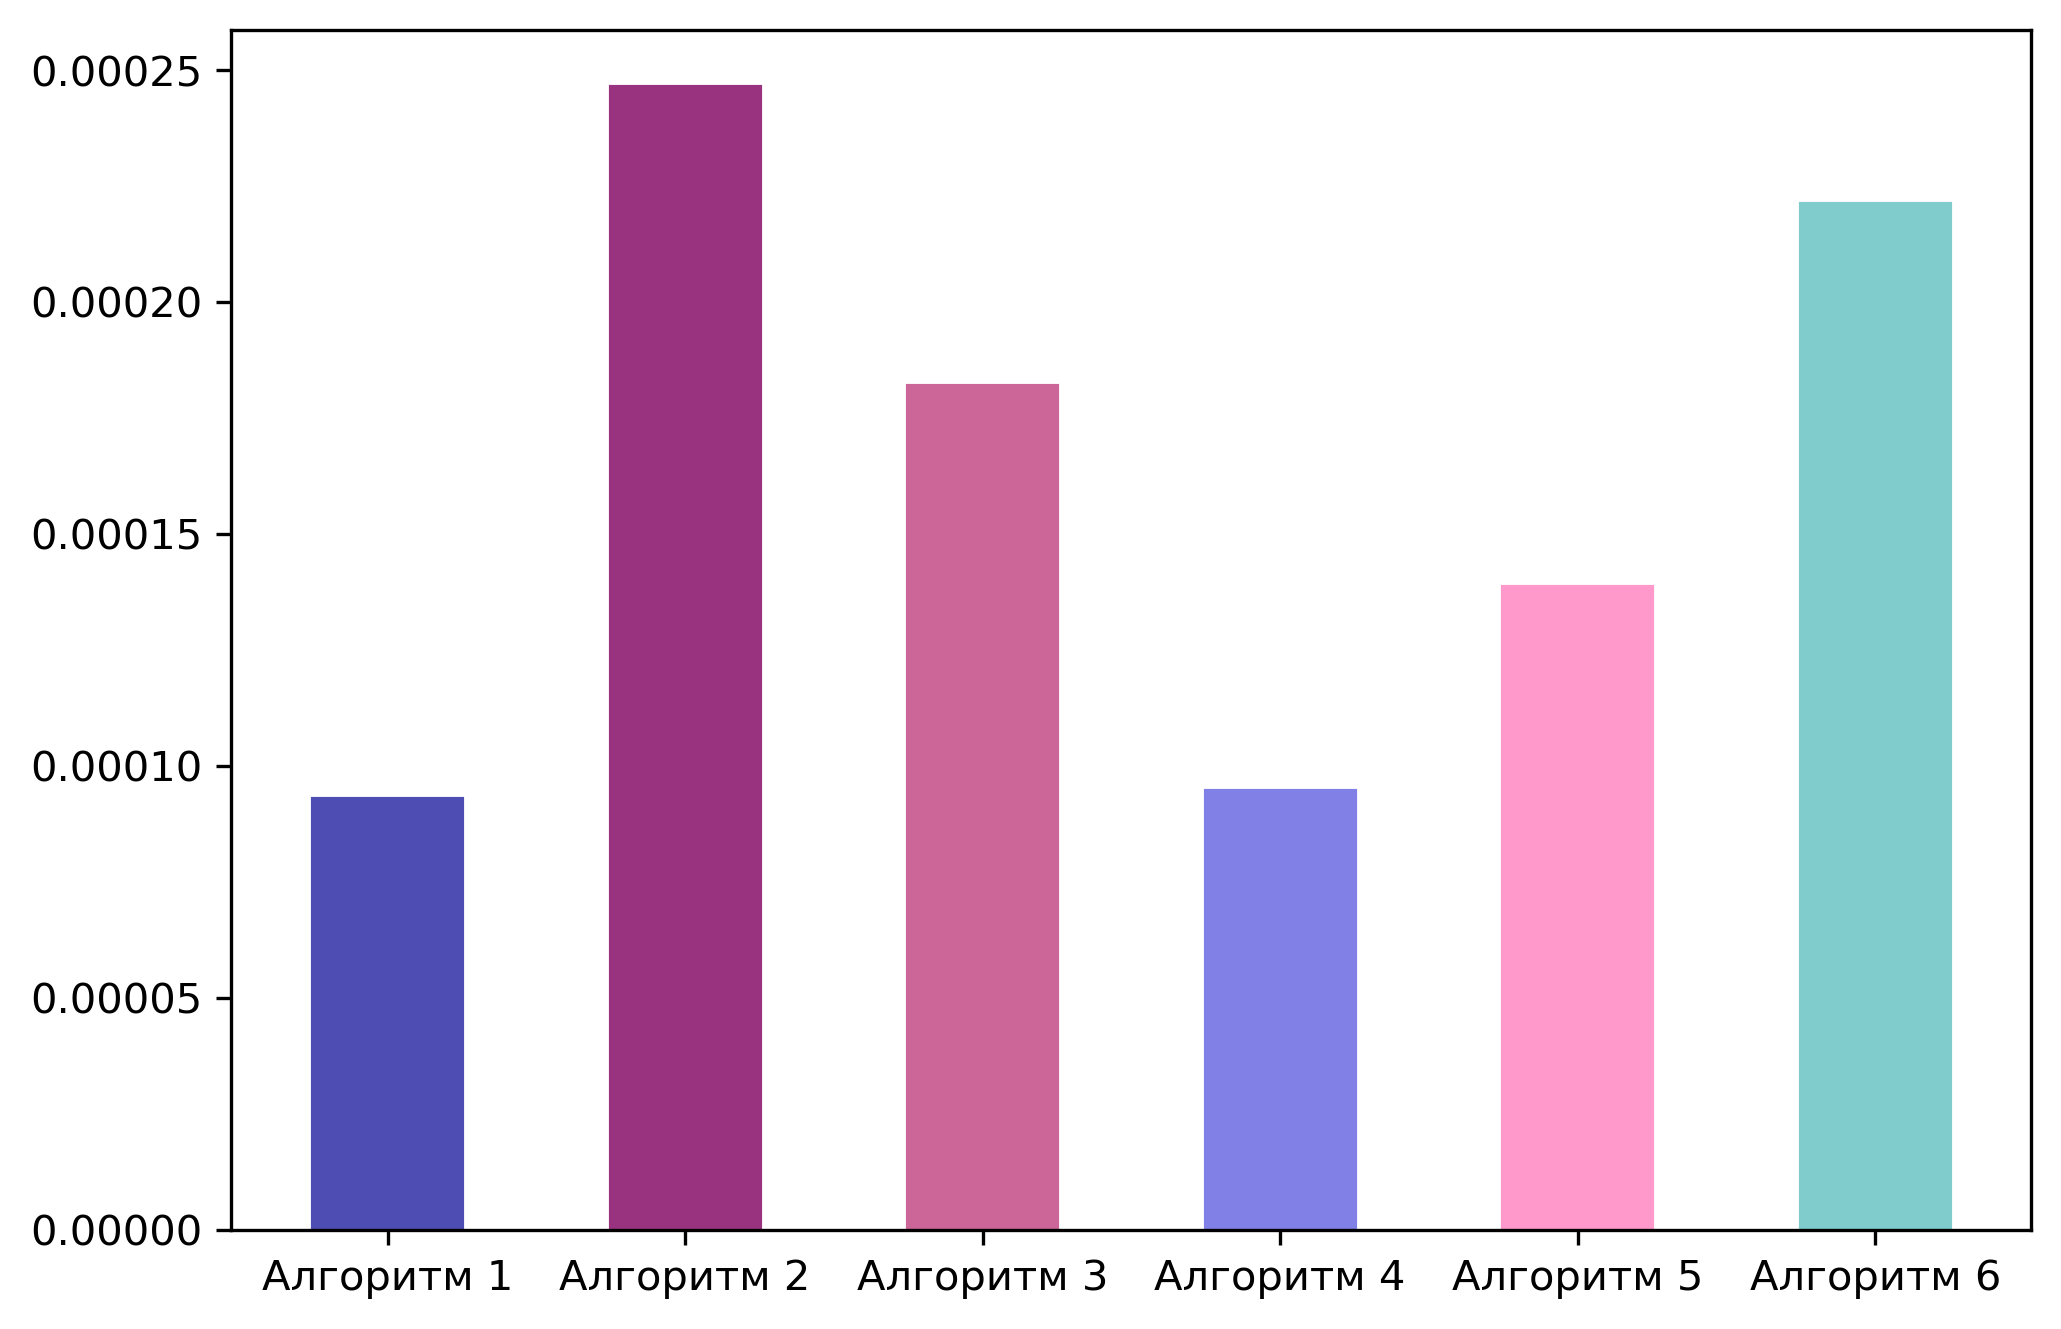

In [68]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = [f"Алгоритм {i}" for i in range(1,7)]
averages = [average_time_1, average_time_2, average_time_3, average_time_4, average_time_5, average_time_6]
barlist = ax.bar(langs, averages, 0.5)
barlist[0].set_color((0.3, 0.3, 0.7))
barlist[1].set_color((0.6, 0.2, 0.5))
barlist[2].set_color((0.8, 0.4, 0.6))
barlist[3].set_color((0.5, 0.5, 0.9))
barlist[4].set_color((1.0, 0.6, 0.8))
barlist[5].set_color((0.5, 0.8, 0.8))
plt.gcf().set_dpi(300)
plt.show()

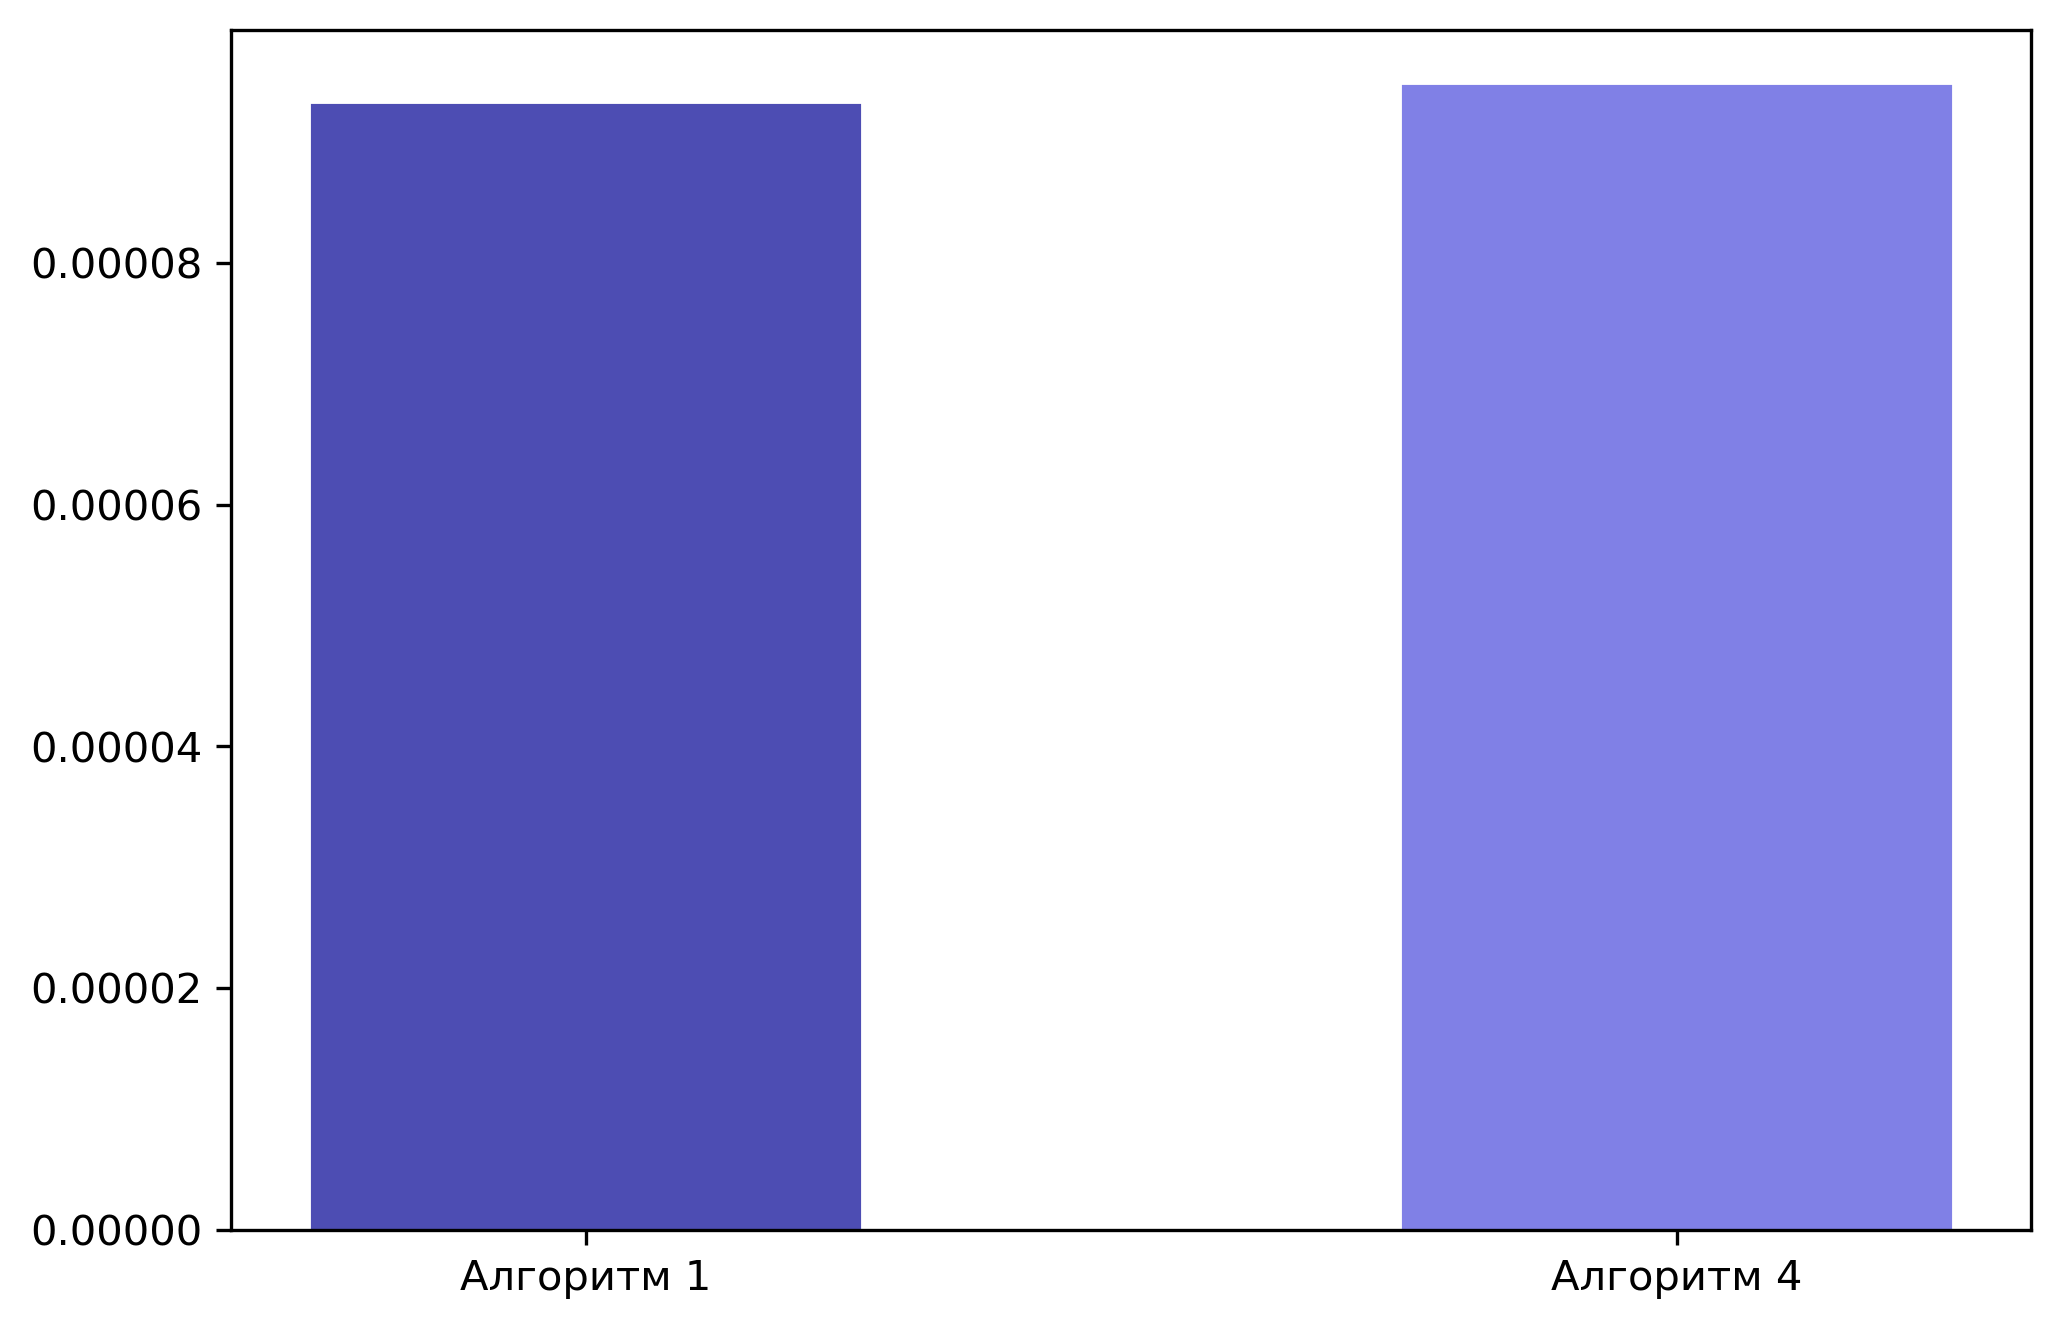

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ["Алгоритм 1", "Алгоритм 4"]
averages = [average_time_1, average_time_4]
barlist = ax.bar(langs, averages, 0.5)
barlist[0].set_color((0.3, 0.3, 0.7))
barlist[1].set_color((0.5, 0.5, 0.9))
plt.gcf().set_dpi(300)
plt.show()

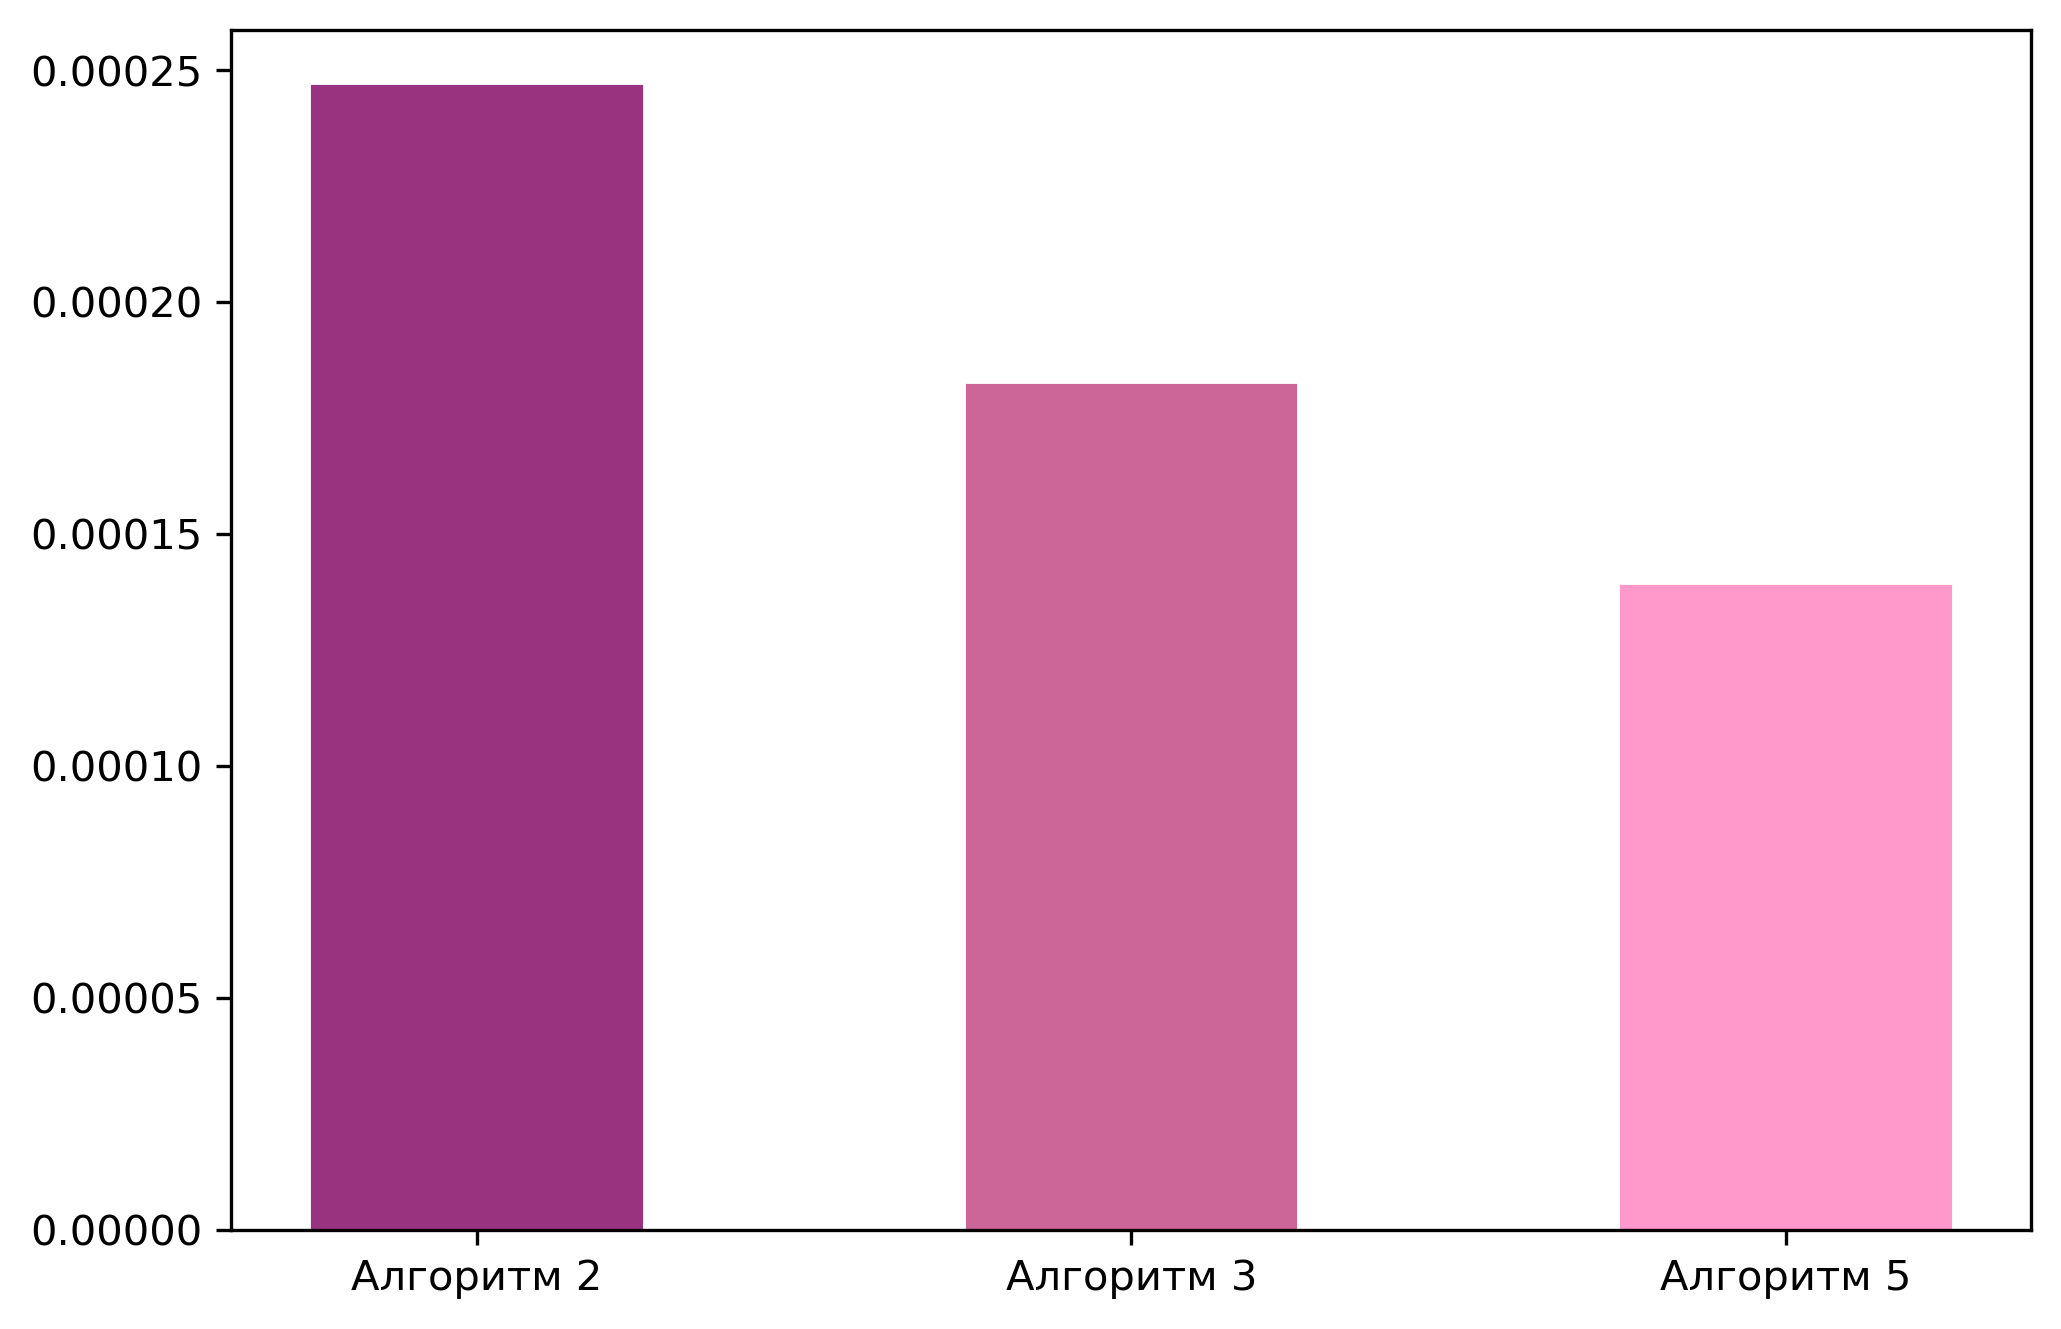

In [70]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ["Алгоритм 2", "Алгоритм 3", "Алгоритм 5"]
averages = [average_time_2, average_time_3, average_time_5]
barlist = ax.bar(langs, averages, 0.5)
barlist[0].set_color((0.6, 0.2, 0.5))
barlist[1].set_color((0.8, 0.4, 0.6))
barlist[2].set_color((1.0, 0.6, 0.8))
plt.gcf().set_dpi(300)
plt.show()